In [1]:
# Remember to set Runtime > Change runtime type to one with a GPU.

# Setup
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Mounted at /content/gdrive


In [2]:
# Find the UC Merced Land Use data set on Google drive -- the drive was mounted as part of the default setup
# https://www.researchgate.net/figure/21-class-UC-Merced-land-use-Dataset-RGB-a-agricultural-b-airplane-c_fig3_312185111
import os
os.listdir( "gdrive/MyDrive/Dataset" )

['Taxi_Trips__2024-__20241019.csv', 'UCMerced_LandUse.zip']

In [3]:
# Unzip the data set
!unzip "gdrive/MyDrive/Dataset/UCMerced_LandUse.zip"
print( "\n\n" )
os.listdir( )

Archive:  gdrive/MyDrive/Dataset/UCMerced_LandUse.zip
   creating: UCMerced_LandUse/
  inflating: __MACOSX/._UCMerced_LandUse  
  inflating: UCMerced_LandUse/.DS_Store  
  inflating: __MACOSX/UCMerced_LandUse/._.DS_Store  
   creating: UCMerced_LandUse/Images/
  inflating: __MACOSX/UCMerced_LandUse/._Images  
  inflating: UCMerced_LandUse/readme.txt.bak  
  inflating: __MACOSX/UCMerced_LandUse/._readme.txt.bak  
  inflating: UCMerced_LandUse/readme.txt  
  inflating: __MACOSX/UCMerced_LandUse/._readme.txt  
   creating: UCMerced_LandUse/Images/forest/
  inflating: __MACOSX/UCMerced_LandUse/Images/._forest  
   creating: UCMerced_LandUse/Images/buildings/
  inflating: __MACOSX/UCMerced_LandUse/Images/._buildings  
   creating: UCMerced_LandUse/Images/river/
  inflating: __MACOSX/UCMerced_LandUse/Images/._river  
   creating: UCMerced_LandUse/Images/mobilehomepark/
  inflating: __MACOSX/UCMerced_LandUse/Images/._mobilehomepark  
  inflating: UCMerced_LandUse/Images/.DS_Store  
  inflatin

['.config', '__MACOSX', 'gdrive', 'UCMerced_LandUse', 'sample_data']

In [4]:
# Let's see what's in the extracted data
print( f"root directory:\n{os.listdir( 'UCMerced_LandUse' )}\n\nimages directory:\n{os.listdir( 'UCMerced_LandUse/Images' )}\n\nairplane image directory:\n{os.listdir( 'UCMerced_LandUse/Images/airplane')}" )

root directory:
['readme.txt', 'readme.txt.bak', 'Images', '.DS_Store']

images directory:
['chaparral', 'harbor', 'overpass', 'storagetanks', 'agricultural', 'baseballdiamond', 'sparseresidential', 'golfcourse', 'mobilehomepark', 'intersection', 'airplane', 'beach', 'denseresidential', 'mediumresidential', 'parkinglot', 'river', 'runway', 'buildings', '.DS_Store', 'freeway', 'forest', 'tenniscourt']

airplane image directory:
['airplane54.tif', 'airplane58.tif', 'airplane80.tif', 'airplane92.tif', 'airplane26.tif', 'airplane64.tif', 'airplane22.tif', 'airplane14.tif', 'airplane07.tif', 'airplane76.tif', 'airplane10.tif', 'airplane15.tif', 'airplane32.tif', 'airplane72.tif', 'airplane46.tif', 'airplane17.tif', 'airplane49.tif', 'airplane03.tif', 'airplane98.tif', 'airplane06.tif', 'airplane00.tif', 'airplane18.tif', 'airplane43.tif', 'airplane21.tif', 'airplane09.tif', 'airplane86.tif', 'airplane31.tif', 'airplane53.tif', 'airplane78.tif', 'airplane42.tif', 'airplane37.tif', 'airplane7

In [5]:
# We need to label the data with the individual image filenames, so let's craft a regex to do that
filename = "airplane54.tif"
import re
re.findall( r"(.+)\d\d.tif", filename ) # the regex extracts operation gets "(.+)" which is all the characters that proceed two digits "\d\d" and a ".tif" extension

# Let's apply this operation to everything and confirm the result
images_dir_path = os.path.join( "UCMerced_LandUse", "Images" )
label_set = set( )
for category_dir_name in os.listdir( images_dir_path ):
  if category_dir_name == ".DS_Store": #  skip invalid directories
    continue
  dir_path = os.path.join( images_dir_path, category_dir_name )
  for filename in os.listdir( dir_path ):
    label_set.add( re.findall( r"(.+)\d\d.tif", filename )[ 0 ] )
print( f"distinct labels:\n{label_set}" )

# Ok this looks good!

distinct labels:
{'forest', 'airplane', 'golfcourse', 'baseballdiamond', 'overpass', 'mobilehomepark', 'intersection', 'river', 'tenniscourt', 'denseresidential', 'agricultural', 'chaparral', 'storagetanks', 'buildings', 'harbor', 'sparseresidential', 'parkinglot', 'mediumresidential', 'freeway', 'beach', 'runway'}


In [6]:
# Lets create a data block -- this is a wrapper around the original data to make it easier to get to a normalized view
block = DataBlock( # https://docs.fast.ai/data.block.html
    blocks = ( ImageBlock, CategoryBlock ), # x = image, y = label
    get_items = get_image_files, # items are images
    splitter = RandomSplitter( seed = 42 ), # randomly assign sample to train-validation - https://docs.fast.ai/data.transforms.html#RandomSplitter
    get_y = using_attr( RegexLabeller( r"(.+)\d\d.tif" ), "name" ), # how to get the label
    item_tfms = Resize( 256 ), # apply this to each item -- verify that the dimensions are the same, even though this dataset says they are they aren't
    batch_tfms = aug_transforms( ) #  augmentation transforms -- https://docs.fast.ai/vision.augment.html#aug_transforms
    )

# Lets use the data block to create a data loader
loaders = block.dataloaders( images_dir_path )
print( f"loaders:\n{loaders}" )

loaders:


In [7]:
# Let's create a learner using an existing model
learner = cnn_learner(
    loaders, # where the data comes from
    alexnet, # one of simplest pre-trained models (https://pytorch.org/vision/stable/models.html)
    metrics = error_rate # supplementary metrics to display while training
    )

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 120MB/s]


In [8]:
# Lets train for a single epoch to confirm all things are set up properly
learner.fine_tune( 1 )

# What is fine_tune doing & why are there two epochs when we specified only one?
# - the model is frozen except the new output layer
# - we do a single training epoch on the output layer
# - the model is unfrozen
# - we run the specified number of epochs, in this case 1, on the entire model

epoch,train_loss,valid_loss,error_rate,time
0,3.080778,0.765210,0.235714,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.985933,0.498811,0.157143,00:05


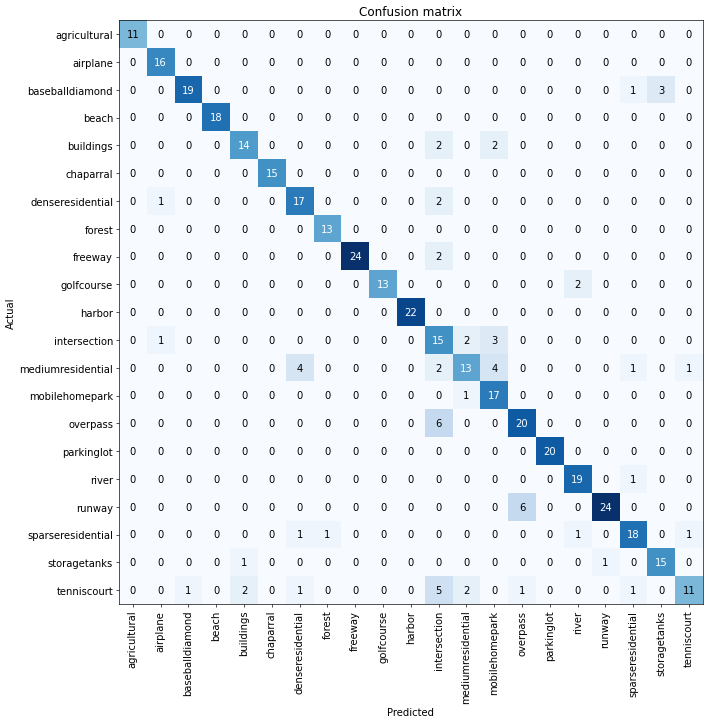

In [9]:
#  What is our starting state?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 12, 12 ), dpi = 60 )

# Pretty darn good...
# - some classes that get confused, specifically dense-medium residential
# - since we randomly split, we can see some slight imbalance, but nothing too terrible

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

LR suggestion = 2.29e-04


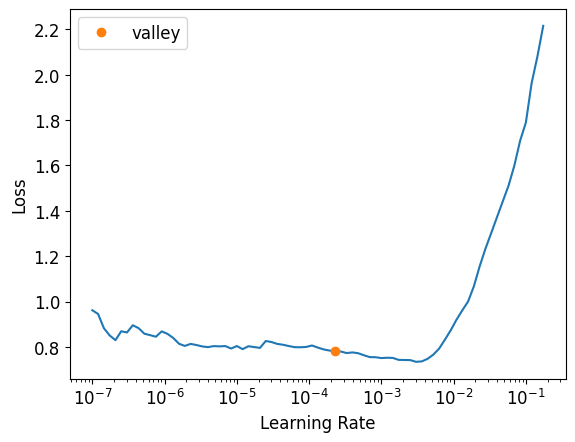

In [10]:
# What's a good learning rate for this model-problem?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [11]:
# We could tinker in more detail with the layer training, but let's just run
# fine_tune a couple of times with the preferred learning rate and see if that
# gets us to a good spot
for i in range( 5 ):
  print( f"\n\nfine tuning iteration #{i+1}" )
  learner.fine_tune( 1, base_lr = 2.29e-4 )



fine tuning iteration #1


epoch,train_loss,valid_loss,error_rate,time
0,0.779396,0.458018,0.138095,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.731683,0.438958,0.123810,00:07




fine tuning iteration #2


epoch,train_loss,valid_loss,error_rate,time
0,0.700241,0.417332,0.123810,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.639347,0.408206,0.119048,00:05




fine tuning iteration #3


epoch,train_loss,valid_loss,error_rate,time
0,0.599034,0.402546,0.111905,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.574557,0.402832,0.116667,00:05




fine tuning iteration #4


epoch,train_loss,valid_loss,error_rate,time
0,0.577114,0.379945,0.109524,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.575395,0.379757,0.100000,00:06




fine tuning iteration #5


epoch,train_loss,valid_loss,error_rate,time
0,0.530850,0.367600,0.100000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.503498,0.368352,0.092857,00:06


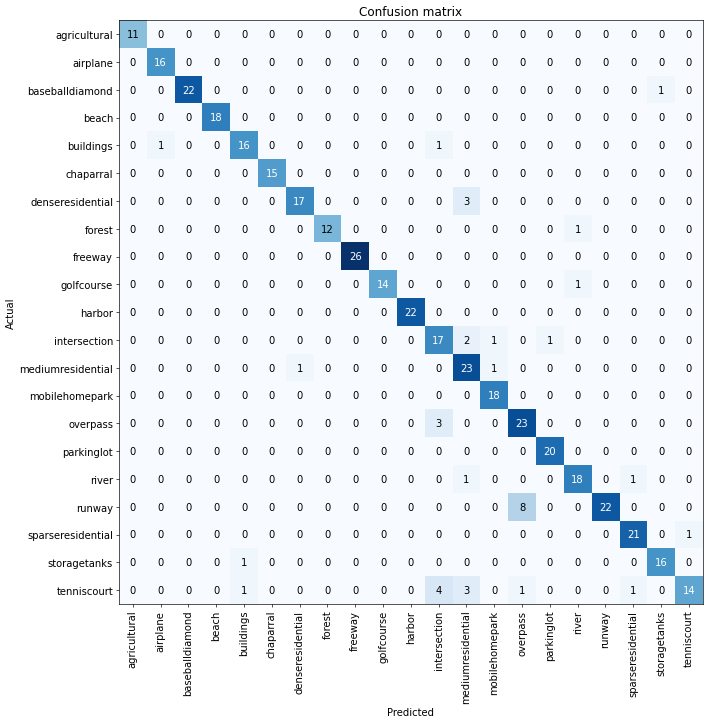

In [12]:
# What does our confusion matrix look like now?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 12, 12 ), dpi = 60 )

# We are noticably more tight on the diagnoal.

prediction = airplane




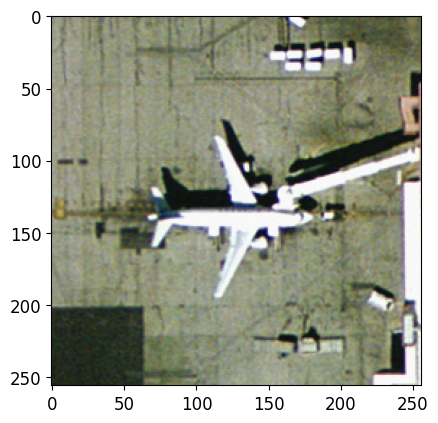

In [13]:
# Let's make a prediction using one of the original images
file_path = os.path.join( images_dir_path, "airplane" )
file_path = os.path.join( file_path, "airplane54.tif" )
from PIL import Image
image = Image.open( file_path )
from matplotlib import pyplot
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( file_path )
print( f"prediction = {prediction}\n\n" )

In [14]:
# Let's also save our model for posterity
learner.export( )
os.listdir( )

['.config',
 '__MACOSX',
 'gdrive',
 'models',
 'export.pkl',
 'UCMerced_LandUse',
 'sample_data']

prediction = mobilehomepark




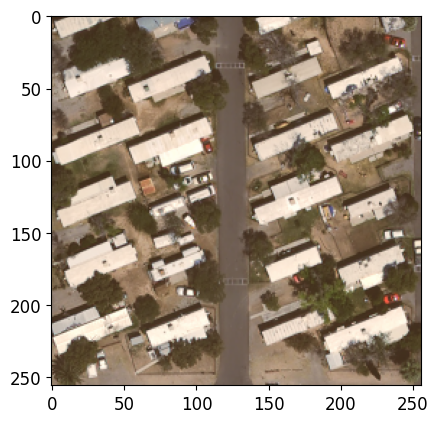

In [15]:
# And to come full circle, let's clear the learner, load the model and make a
# prediction to demonstrate portability
learner = []
learner = load_learner( "export.pkl" )

# Let's make a prediction using one of the original images
file_path = os.path.join( images_dir_path, "mobilehomepark" )
file_path = os.path.join( file_path, "mobilehomepark08.tif" )
from PIL import Image
image = Image.open( file_path )
from matplotlib import pyplot
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( file_path )
print( f"prediction = {prediction}\n\n" )